In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

df = pd.read_csv("C:/Users/aimza/Desktop/Project Chrun/telecom_users_prep.csv")
df = df.drop(columns=['gender', 'PhoneService', 'Unnamed: 0'])

label_encoder = preprocessing.LabelEncoder()

#MultipleLines     no = 0, No phone service = 1 , yes = 2
#InternetService   DSL = 0, Fiber optic = 1, No = 2
#Contact           Month-to-month = 0, One-year = 1 , Two-year = 2
#PaymentMethod     Bank transfer = 0, Credit card = 1, Electronic check = 2

for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

df

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,1,72,2,2,1,1,1,1,1,1,2,0,1,71,2980,0
1,0,0,0,44,0,1,0,2,2,0,2,0,0,1,1,1016,4182,0
2,1,1,0,38,2,1,0,0,0,0,0,0,0,1,0,772,3675,1
3,0,0,0,4,0,0,0,0,0,0,0,2,0,1,2,455,859,0
4,0,0,0,2,0,0,2,0,2,0,0,0,0,0,2,407,514,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0,1,0,1,0,1,2,0,0,0,2,2,0,1,2,1146,434,1
5982,0,1,1,23,2,0,2,2,2,2,2,2,2,1,1,1074,3313,0
5983,0,1,1,12,0,2,1,1,1,1,1,1,0,1,2,52,1021,0
5984,1,0,0,12,2,1,0,0,2,0,2,2,0,1,2,1225,2393,1


In [2]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

array = df.values
X = array[:,0:-1]
Y = array[:,-1]

rfecv = RFECV(tree.DecisionTreeClassifier(random_state=0) , scoring='accuracy')
fit = rfecv.fit(X, Y)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

#Partner,Dependents,tenure, InternetService, OnlineSecurity, DeviceProtection
#Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges

Num Features: 11
Selected Features: [False  True  True  True False  True  True False  True False False False
  True  True  True  True  True]
Feature Ranking: [2 1 1 1 4 1 1 3 1 6 7 5 1 1 1 1 1]


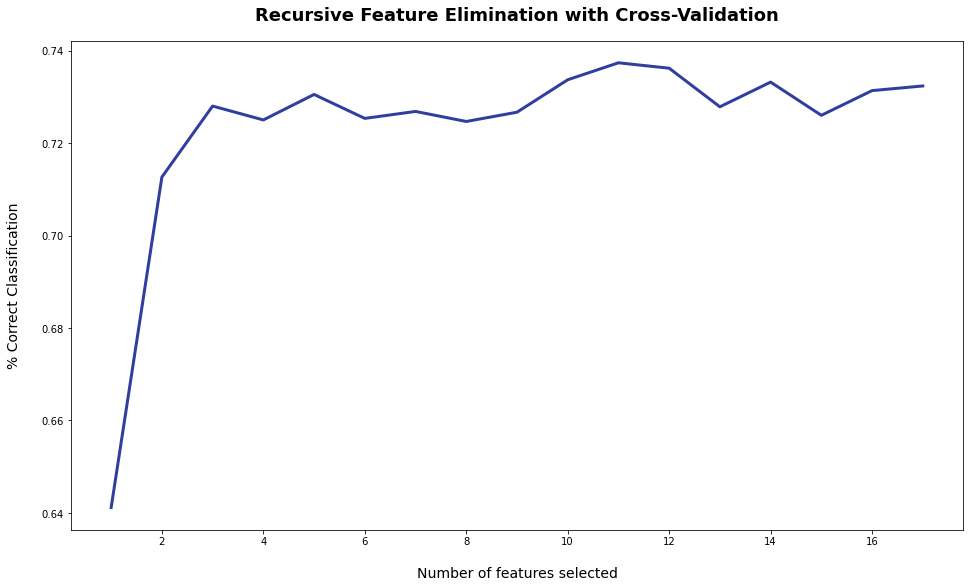

In [3]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [4]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from graphviz import Source
from IPython.display import SVG

df_sel = df.copy(deep=False)

#select some feature
df_sel = df.drop(df.columns[[0,4,7,9,10,11]], axis=1)
df_sel

,Partner,Dependents,tenure,InternetService,OnlineSecurity,DeviceProtection,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,1,72,2,1,1,2,0,1,71,2980,0
1,0,0,44,1,0,2,0,1,1,1016,4182,0
2,1,0,38,1,0,0,0,1,0,772,3675,1
3,0,0,4,0,0,0,0,1,2,455,859,0
4,0,0,2,0,2,2,0,0,2,407,514,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5981,1,0,1,1,2,0,0,1,2,1146,434,1
5982,1,1,23,0,2,2,2,1,1,1074,3313,0
5983,1,1,12,2,1,1,0,1,2,52,1021,0
5984,0,0,12,1,0,2,0,1,2,1225,2393,1


In [10]:
array = df_sel.values
X = array[:,0:-1]
y = array[:,-1]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
y_score = clf.score(X,y)

print(classification_report(y_test,y_pred))
# class labels

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       870
           1       0.50      0.52      0.51       328

    accuracy                           0.72      1198
   macro avg       0.66      0.66      0.66      1198
weighted avg       0.73      0.72      0.73      1198



0.9426996324757768

In [ ]:
graph = Source(export_graphviz(clf, out_file=None,  
                filled=True, rounded=True,
                special_characters=True,feature_names = list(df_sel.iloc[:,0:-1].columns),class_names=['0','1']))

display(SVG(graph.pipe(format='svg')))
graph.format = 'png'
graph.render('Dtree_chrun',view=True)

In [42]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras
from ann_visualizer.visualize import ann_viz

model = Sequential()

# first layer: 11 nodes,  dimensions 8, Rectifed Linear Unit function (ReLU)
model.add(Dense(11, input_dim=11, activation='relu'))

# additional layer: 8 nodes,  Rectifed Linear Unit function (ReLU)
for i in range(1,50):
    model.add(Dense(7, activation='relu'))
    
# output layer: 1 node, sigmoid function
model.add(Dense(1,activation ='sigmoid'))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_254 (Dense)            (None, 11)                132       
_________________________________________________________________
dense_255 (Dense)            (None, 7)                 84        
_________________________________________________________________
dense_256 (Dense)            (None, 7)                 56        
_________________________________________________________________
dense_257 (Dense)            (None, 7)                 56        
_________________________________________________________________
dense_258 (Dense)            (None, 7)                 56        
_________________________________________________________________
dense_259 (Dense)            (None, 7)                 56        
_________________________________________________________________
dense_260 (Dense)            (None, 7)                

In [43]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
120/120 [==============================] - 3s 7ms/step - loss: 0.6648 - accuracy: 0.7295 - val_loss: 0.5926 - val_accuracy: 0.7223
Epoch 2/20
120/120 [==============================] - 0s 4ms/step - loss: 0.5862 - accuracy: 0.7279 - val_loss: 0.6106 - val_accuracy: 0.7223
Epoch 3/20
120/120 [==============================] - 0s 3ms/step - loss: 0.5455 - accuracy: 0.7498 - val_loss: 0.5012 - val_accuracy: 0.7223
Epoch 4/20
120/120 [==============================] - 0s 3ms/step - loss: 0.4815 - accuracy: 0.7391 - val_loss: 0.4932 - val_accuracy: 0.7223
Epoch 5/20
120/120 [==============================] - 0s 3ms/step - loss: 0.4621 - accuracy: 0.7533 - val_loss: 0.4903 - val_accuracy: 0.7526
Epoch 6/20
120/120 [==============================] - 0s 3ms/step - loss: 0.4707 - accuracy: 0.7795 - val_loss: 0.4906 - val_accuracy: 0.7463
Epoch 7/20
120/120 [==============================] - 0s 3ms/step - loss: 0.4646 - accuracy: 0.7788 - val_loss: 0.4882 - val_accuracy: 0.7641
Epoch 

In [51]:
y_pred_net = np.round(model.predict(X_test))
print(classification_report(y_test,y_pred_net))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84       870
           1       0.00      0.00      0.00       328

    accuracy                           0.73      1198
   macro avg       0.36      0.50      0.42      1198
weighted avg       0.53      0.73      0.61      1198



C:\Users\aimza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aimza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aimza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
